# Supplier Selection Methods - Fuzzy Rating Introduction

This notebook provides an introduction (more like a teaser) for scoring methods based on the application of Fuzzy sets. First, we import the packages that we are going to use.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

With the exception of AHP, the previous scoring methods we have considered required us to evaluate a large number of suppliers on a numeric scale. However, the relationship between suppliers that is implied by these rating is not necessarily true. For example, if we give one supplier a score of 4 on a particular dimension and another a score of 8, is it necessarily true that the second supplier is twice as good as the first? Another problem is that there may be preferences that are hard, if not impossible, to express with the basic weighting method.

To overcome these challenges, we are going to look at the use of fuzzy logic for supplier selection. From Wikipedia, with added parenthetical statements:
>Fuzzy logic is a form of logic in which the truth values for variables may be any real number between 0 and 1. It is employed to handle the concept of partial truth, where the truth value may range between completely true and completely false. By contrast, in Boolean (`traditional`) logic, the truth values of variables may only be the integer values 0 or 1. The term fuzzy logic was introduced with the 1965 proposal of fuzzy set theory by Lotfi Zadeh. Fuzzy logic had however been studied since the 1920s, as infinite-valued logic—notably by Łukasiewicz and Tarski. Fuzzy logic has been applied to many fields, from control theory to artificial intelligence (`and supplier selection`).

The following code block imports a brief YouTube video that provides a very good (which is a fuzzy statement itself) description of fuzzy logic at a high level.

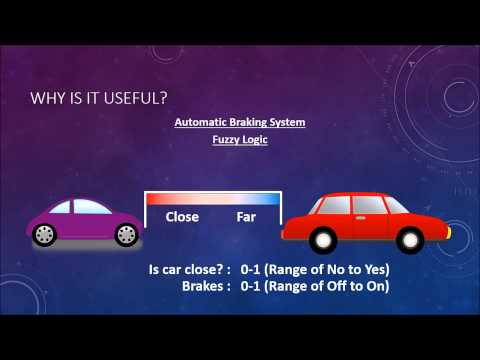

In [2]:
from IPython.display import YouTubeVideo
# a talk about IPython at Sage Days at U. Washington, Seattle.
# Video credit: William Stein.
YouTubeVideo('rln_kZbYaWc',width=800, height=600)

The module that we will use to employ fuzzy logic in the context of supplier selection are not part of the base Anaconda distribution. Thus, they will need to be installed. The following steps show how to install the necessary packages using the Anaconda prompt. If you were using a basic Python distribution, you would us the `pip install` functionality to install the package `scikit-fuzzy`.

- Open the "Anaconda Prompt" that is included with the Anaconda installation

<img src="skfuzzy_import1.png" style="width: 800px;">

- Once opened, you should see a screen similar to that shown below.

<img src="skfuzzy_import2.png" style="width: 900px;">

- Type the command `pip install skikit-fuzzy` and press `enter`. Upon completion of the install, you should see a series of messages as shown below.

<img src="skfuzzy_import3.png" style="width: 900px;">


With `scikit-fuzzy` successfuly installed, we need to import `skfuzzy`.

In [3]:
import skfuzzy as fuzz

To provide an example, we will step through the calculation of a fuzzy score for a single supplier that is based on only two subjective criteria. The following cells generates the *universe* for the factors we want to consider, which specifies the range of values for which each criteria is defined. We assume that both of these subjective factors range between 1 and 10, with 1 being the lowest score and 10 being the highest. In addition to the universe for the subjective factors, we will also generate a universe for the score that we will use the subjective factors to compute.

In [4]:
warranty_universe = np.arange(1, 10.1, 0.1)
payment_universe = np.arange(1, 10.1, 0.1) 
score_universe = np.arange(1, 10.1, 0.1) 

We will now generate *fuzzy memebership functions* for each of the subjective factors and the score. The membership functions map each element in the universe of the different inputs and outputs to a membership value between 0 and 1. The following code block illustrates the definition of a membership function for the *warranty terms* factor, and plots the function. Note that the `skfuzzy` module includes several options for the different curves that make up the membership function.

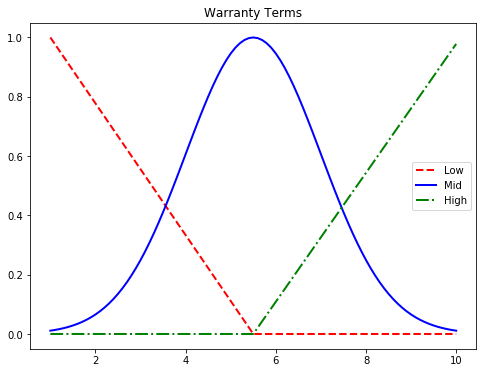

In [5]:
warranty_lo = fuzz.trimf(warranty_universe, [1, 1, 5.5])
warranty_md = fuzz.gaussmf(warranty_universe, 5.5, 1.5)
warranty_hi = fuzz.trimf(warranty_universe, [5.5, 10.1, 10.1])

fig, ax = plt.subplots(1,1, figsize=(8, 6))

ax.plot(warranty_universe, warranty_lo, 'r--', linewidth=2, label='Low')
ax.plot(warranty_universe, warranty_md, 'b', linewidth=2, label='Mid')
ax.plot(warranty_universe, warranty_hi, 'g-.', linewidth=2, label='High')
ax.set_title('Warranty Terms')
ax.legend()
plt.show()

The following code block illustrates the definition of a membership function for the *payment terms* factor, and plots the function.

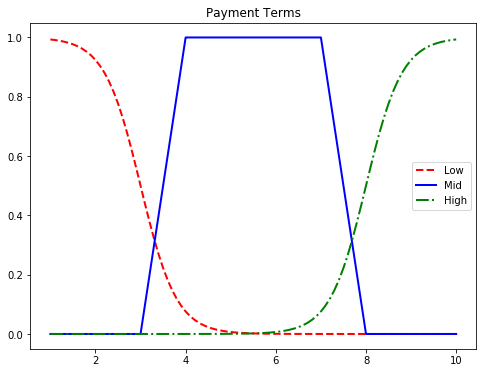

In [6]:
payment_lo = fuzz.sigmf(payment_universe, 3, -2.5)
payment_md = fuzz.trapmf(payment_universe, [3,4,7,8])
payment_hi = fuzz.sigmf(payment_universe, 8, 2.5)

fig, ax = plt.subplots(1,1, figsize=(8, 6))

ax.plot(payment_universe, payment_lo, 'r--', linewidth=2, label='Low')
ax.plot(payment_universe, payment_md, 'b', linewidth=2, label='Mid')
ax.plot(payment_universe, payment_hi, 'g-.', linewidth=2, label='High')
ax.set_title('Payment Terms')
ax.legend()
plt.show()

The following code block illustrates the definition of a membership function for the *score* and plots the function.

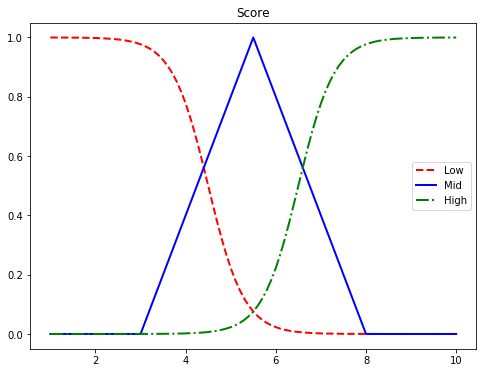

In [7]:
score_lo = fuzz.sigmf(score_universe, 4.5, -2.5)
score_md = fuzz.trimf(score_universe, [3, 5.5, 8])
score_hi = fuzz.sigmf(score_universe, 6.5, 2.5)

fig, ax = plt.subplots(1,1, figsize=(8, 6))

ax.plot(score_universe, score_lo, 'r--', linewidth=2, label='Low')
ax.plot(score_universe, score_md, 'b', linewidth=2, label='Mid')
ax.plot(score_universe, score_hi, 'g-.', linewidth=2, label='High')
ax.set_title('Score')
ax.legend()
plt.show()

With our membership functions defined, we will now demonstrate how they may be combined to calculate a score for our supplier based on rules. First, the following code block specifies the ratings for our supplier with respect to warranty and payment terms.

In [8]:
Warranty_Terms = 7.42
Payment_Terms = 3.87

Our ratings do not exactly match elements in the universe for each of the factors that we previously defined. Thus, we need to use interpolation to determine values for the functions at the specified values. This is achieved in the following code block. **Note that we have to conduct the interpolation for each part of the membership function for the factors since a given value may belong to more than one region.** 

The supplier's degree of membership in the low warranty terms region is: 0.000
The supplier's degree of membership in the medium warranty terms region is: 0.441
The supplier's degree of membership in the high warranty terms region is: 0.417



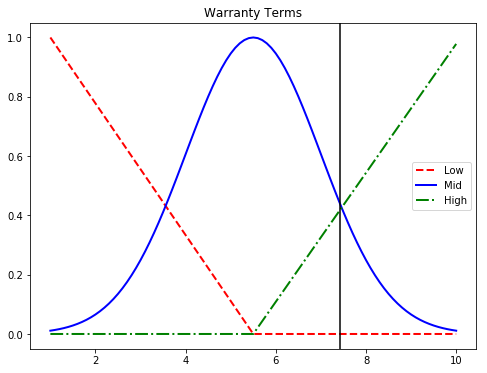

The supplier's degree of membership in the low payment terms region is: 0.103
The supplier's degree of membership in the medium payment terms region is: 0.870
The supplier's degree of membership in the high payment terms region is: 0.000


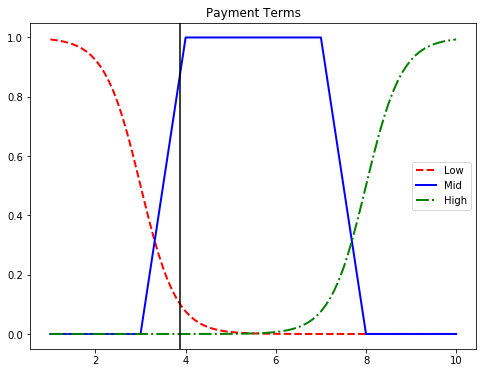

In [9]:
warranty_level_lo = fuzz.interp_membership(warranty_universe, warranty_lo, Warranty_Terms)
warranty_level_md = fuzz.interp_membership(warranty_universe, warranty_md, Warranty_Terms)
warranty_level_hi = fuzz.interp_membership(warranty_universe, warranty_hi, Warranty_Terms)
print('The supplier\'s degree of membership in the low warranty terms region is: {}'.format('%.3f'% warranty_level_lo))
print('The supplier\'s degree of membership in the medium warranty terms region is: {}'.format('%.3f'% warranty_level_md))
print('The supplier\'s degree of membership in the high warranty terms region is: {}\n'.format('%.3f'% warranty_level_hi))

fig, ax = plt.subplots(1,1, figsize=(8, 6))

ax.plot(warranty_universe, warranty_lo, 'r--', linewidth=2, label='Low')
ax.plot(warranty_universe, warranty_md, 'b', linewidth=2, label='Mid')
ax.plot(warranty_universe, warranty_hi, 'g-.', linewidth=2, label='High')
ax.axvline(x=Warranty_Terms, c='k')
ax.set_title('Warranty Terms')
ax.legend()
plt.show()

payment_level_lo = fuzz.interp_membership(payment_universe, payment_lo, Payment_Terms)
payment_level_md = fuzz.interp_membership(payment_universe, payment_md, Payment_Terms)
payment_level_hi = fuzz.interp_membership(payment_universe, payment_hi, Payment_Terms)
print('The supplier\'s degree of membership in the low payment terms region is: {}'.format('%.3f'% payment_level_lo))
print('The supplier\'s degree of membership in the medium payment terms region is: {}'.format('%.3f'% payment_level_md))
print('The supplier\'s degree of membership in the high payment terms region is: {}'.format('%.3f'% payment_level_hi))

fig, ax = plt.subplots(1,1, figsize=(8, 6))

ax.plot(payment_universe, payment_lo, 'r--', linewidth=2, label='Low')
ax.plot(payment_universe, payment_md, 'b', linewidth=2, label='Mid')
ax.plot(payment_universe, payment_hi, 'g-.', linewidth=2, label='High')
ax.axvline(x=Payment_Terms, c='k')
ax.set_title('Payment Terms')
ax.legend()
plt.show()

We can now use these membership values to specify rules that we want to use when scoring. The first rule that we will impose is that if either the payment terms or warrant terms are low, the score should be lower. We incorporate the `OR` logic by determining the maximum degree by which the payment and warranty terms contribute to the *low* regions of their respective membership functions. This is done in the following code block.

The supplier's degree of membership in the low payment terms region is: 0.103
The supplier's degree of membership in the low warranty terms region is: 0.000
The supplier's maximum degree of membership to either low region is: 0.103


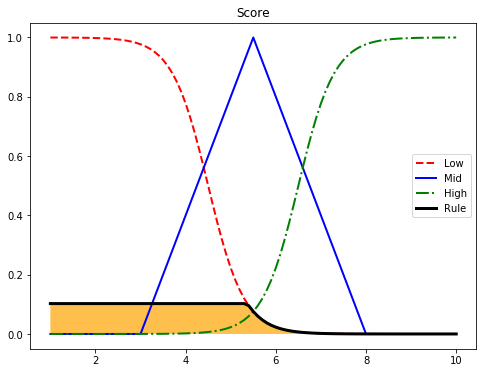

In [10]:
active_rule1 = np.fmax(payment_level_lo, warranty_level_lo)
print('The supplier\'s degree of membership in the low payment terms region is: {}'.format('%.3f'% payment_level_lo))
print('The supplier\'s degree of membership in the low warranty terms region is: {}'.format('%.3f'% warranty_level_lo))
print('The supplier\'s maximum degree of membership to either low region is: {}'.format('%.3f'% active_rule1))

score_activation_lo = np.fmin(active_rule1,score_lo)

score_zeros = np.zeros_like(score_universe)
fig, ax = plt.subplots(1,1, figsize=(8, 6))

ax.plot(score_universe, score_lo, 'r--', linewidth=2, label='Low')
ax.plot(score_universe, score_md, 'b', linewidth=2, label='Mid')
ax.plot(score_universe, score_hi, 'g-.', linewidth=2, label='High')
ax.plot(score_universe, score_activation_lo, 'k', linewidth=3, label='Rule')
ax.fill_between(score_universe, score_zeros, score_activation_lo, facecolor='Orange', alpha=0.7)

ax.set_title('Score')
ax.legend()
plt.show()

Our second rule simply maps the membership for the middle region of the payment terms membership function to the middle region of the score. This rule is captured in the following code block.

The supplier's degree of membership in the middle payment terms region is: 0.870


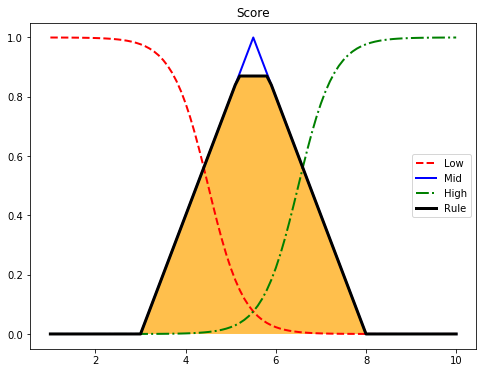

In [11]:
score_activation_md = np.fmin(payment_level_md,score_md)

print('The supplier\'s degree of membership in the middle payment terms region is: {}'.format('%.3f'% payment_level_md))

score_zeros = np.zeros_like(score_universe)
fig, ax = plt.subplots(1,1, figsize=(8, 6))

ax.plot(score_universe, score_lo, 'r--', linewidth=2, label='Low')
ax.plot(score_universe, score_md, 'b', linewidth=2, label='Mid')
ax.plot(score_universe, score_hi, 'g-.', linewidth=2, label='High')
ax.plot(score_universe, score_activation_md, 'k', linewidth=3, label='Rule')
ax.fill_between(score_universe, score_zeros, score_activation_md, facecolor='Orange', alpha=0.7)

ax.set_title('Score')
ax.legend()
plt.show()

The final rule that we impose is that if either the payment terms or warrant terms are high, the score should be higher. This is done in the following code block.

The supplier's degree of membership in the high payment terms region is: 0.000
The supplier's degree of membership in the high warranty terms region is: 0.417
The supplier's maximum degree of membership to either high region is: 0.417


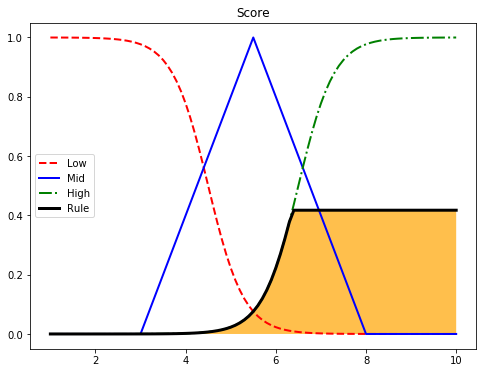

In [12]:
active_rule3 = np.fmax(payment_level_hi, warranty_level_hi)
print('The supplier\'s degree of membership in the high payment terms region is: {}'.format('%.3f'% payment_level_hi))
print('The supplier\'s degree of membership in the high warranty terms region is: {}'.format('%.3f'% warranty_level_hi))
print('The supplier\'s maximum degree of membership to either high region is: {}'.format('%.3f'% active_rule3))

score_activation_hi = np.fmin(active_rule3,score_hi)

score_zeros = np.zeros_like(score_universe)
fig, ax = plt.subplots(1,1, figsize=(8, 6))

ax.plot(score_universe, score_lo, 'r--', linewidth=2, label='Low')
ax.plot(score_universe, score_md, 'b', linewidth=2, label='Mid')
ax.plot(score_universe, score_hi, 'g-.', linewidth=2, label='High')
ax.plot(score_universe, score_activation_hi, 'k', linewidth=3, label='Rule')
ax.fill_between(score_universe, score_zeros, score_activation_hi, facecolor='Orange', alpha=0.7)

ax.set_title('Score')
ax.legend()
plt.show()

Now, we need to aggregate the outputs from our rules as shown in the following code blocks.

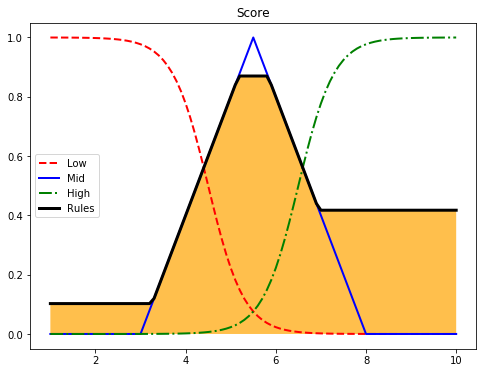

In [13]:
score_aggregated = np.fmax(score_activation_lo,
                           np.fmax(score_activation_md,
                                   score_activation_hi)
                          )

score_zeros = np.zeros_like(score_universe)
fig, ax = plt.subplots(1,1, figsize=(8, 6))

ax.plot(score_universe, score_lo, 'r--', linewidth=2, label='Low')
ax.plot(score_universe, score_md, 'b', linewidth=2, label='Mid')
ax.plot(score_universe, score_hi, 'g-.', linewidth=2, label='High')
ax.plot(score_universe, score_aggregated, 'k', linewidth=3, label='Rules')
ax.fill_between(score_universe, score_zeros, score_aggregated, facecolor='Orange', alpha=0.7)

ax.set_title('Score')
ax.legend()
plt.show()

We use the aggregated curve to compute the score for the supplier using the *centroid* method. This is illustrated in the following code block.

The supplier's score is: 6.208


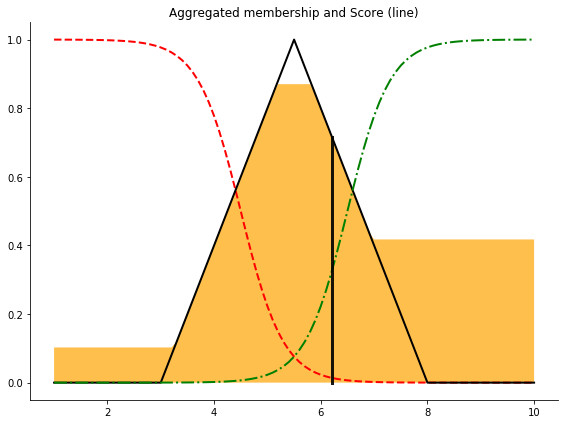

In [14]:
score = fuzz.defuzz(score_universe, score_aggregated, 'centroid')
print('The supplier\'s score is: {}'.format('%.3f'% score))

score_activation = fuzz.interp_membership(score_universe, score_aggregated, score)  # for plot

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(score_universe, score_lo, 'r--', linewidth=2)
ax.plot(score_universe, score_md, 'k', linewidth=2)
ax.plot(score_universe, score_hi, 'g-.', linewidth=2)
ax.fill_between(score_universe, score_zeros, score_aggregated, facecolor='Orange', alpha=0.7)
ax.plot([score, score], [0, score_activation], 'k', linewidth=3, alpha=0.9)
ax.set_title('Aggregated membership and Score (line)')

# Turn off top/right axes
for ax in (ax,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()
plt.show()

The following code block defines an interactive widget that may be used to visualize the effects of varying the scores for the factors and the method used to compute the score. 

In [15]:
# Import libraries for widgets
from ipywidgets import interact, widgets

# Specify parameters for widget layout
widget_layout = widgets.Layout(width='500px', height='40px')

# Define interact function with widgets for dimension and cutoff
# For each widget, the 'description' setting defines the text that will be displayed by the associated widget,
# the 'value' setting defines the default values,
# and we use the 'layout' option to pass the size parameter settings we defined earlier.
# The 'options' setting for the Dropdown widget defines the values in the dropdown box.
# The int slider widget has min, max and step settings
@interact(Current_Warranty = widgets.FloatSlider(description='Warranty Terms:',\
                                            min=1,\
                                            max=10,\
                                            step=0.25,\
                                            value=7.42,\
                                            layout=widget_layout), 
          Current_Payment = widgets.FloatSlider(description='Payment Terms:',\
                                            min=1,\
                                            max=10,\
                                            step=0.25,\
                                            value=3.89,\
                                            layout=widget_layout),
          Current_Method = widgets.Dropdown(description='Method:',\
                                            options=['Mean of Maximum',
                                                     'Centroid',
                                                     'Bisector',
                                                     'Min of Maximum',
                                                     'Max of Maximum'                                                   
                                                    ],\
                                            value='Centroid',\
                                            layout=widget_layout))

def simulate(Current_Warranty,Current_Payment,Current_Method):
    #Test values
    Warranty_Terms = Current_Warranty
    Payment_Terms = Current_Payment
    method = Current_Method

    warranty_level_lo = fuzz.interp_membership(warranty_universe, warranty_lo, Warranty_Terms)
    warranty_level_md = fuzz.interp_membership(warranty_universe, warranty_md, Warranty_Terms)
    warranty_level_hi = fuzz.interp_membership(warranty_universe, warranty_hi, Warranty_Terms)

    payment_level_lo = fuzz.interp_membership(payment_universe, payment_lo, Payment_Terms)
    payment_level_md = fuzz.interp_membership(payment_universe, payment_md, Payment_Terms)
    payment_level_hi = fuzz.interp_membership(payment_universe, payment_hi, Payment_Terms)

    # Now we take our rules and apply them. Rule 1 concerns bad food OR service.
    # The OR operator means we take the maximum of these two.
    active_rule1 = np.fmax(payment_level_lo, warranty_level_lo)
    score_activation_lo = np.fmin(active_rule1,score_lo)

    score_activation_md = np.fmin(payment_level_md,score_md)

    active_rule3 = np.fmax(payment_level_hi, warranty_level_hi)
    score_activation_hi = np.fmin(active_rule3,score_hi)

    score_zeros = np.zeros_like(score_universe) # Creates zeros array of the same shape as x_aggregate

    # Aggregate all three output membership functions together
    score_aggregated = np.fmax(score_activation_lo,
                                np.fmax(score_activation_md,
                                        score_activation_hi)
                               )

    # Calculate defuzzified result
    if method == 'Mean of Maximum':
        score = fuzz.defuzz(score_universe, score_aggregated, 'mom')
    elif method == 'Centroid':
        score = fuzz.defuzz(score_universe, score_aggregated, 'centroid')
    elif method == 'Bisector':
        score = fuzz.defuzz(score_universe, score_aggregated, 'bisector')
    elif method == 'Min of Maximum':
        score = fuzz.defuzz(score_universe, score_aggregated, 'som')
    elif method == 'Max of Maximum':
        score = fuzz.defuzz(score_universe, score_aggregated, 'lom')


    #print("The supplier's fuzzy score is "+str(aggregate))
    score_activation = fuzz.interp_membership(score_universe, score_aggregated, score)  # for plot

    # Visualize this
    fig, ax0 = plt.subplots(figsize=(12, 6))

    ax0.plot(score_universe, score_lo, 'r--', linewidth=2)
    ax0.plot(score_universe, score_md, 'k', linewidth=2)
    ax0.plot(score_universe, score_hi, 'g-.', linewidth=2)
    ax0.fill_between(score_universe, score_zeros, score_aggregated, facecolor='Orange', alpha=0.7)
    ax0.plot([score, score], [0, score_activation], 'k', linewidth=3, alpha=0.9)
    ax0.set_title('Aggregated membership and result (line)')

    # Turn off top/right axes
    for ax in (ax0,):
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()

    plt.tight_layout()
    plt.show()

A Jupyter Widget